# Data Description
This dataset contains lot of historical sales data. It was extracted from a Brazilian top retailer and has many SKUs and many stores. The data was transformed to protect the identity of the retailer.

Every retail business in the world faces a fundamental question: how much inventory should I carry? In one hand to mush inventory means working capital costs, operational costs and a complex operation. On the other hand lack of inventory leads to lost sales, unhappy customers and a damaged brand.

Current inventory management models have many solutions to place the correct order, but they are all based in a single unknown factor: the demand for the next periods.

This is why short-term forecasting is so important in retail and consumer goods industry.

# Problem Statement
Our goal is to forecast the future sales for the next 2-3 weeks.

# Assumption
This is a Time Series Demand Forecasting problem and not a regression problem because we have to perform a short term forecasting based on the past data.

# Objective
  * Demonstrate time series forecasting using Facebook Prophet (Prophet).
  * Forecasting future sales of the retail store after 2016-07-31.

# About Data

  * data ['date']: this is showing the date, the transaction was made
  * estoque ['stock']: this is showing the stock of the store
  * preco ['price']: this is showing each price of the stock
  * venda ['sale']: this is showing the sale of that date

# Data Collection
The data is collected from Kaggle

https://www.kaggle.com/code/ramyasubramanya/retail-sales-forecasting/input

# Data Cleaning

In [ ]:
# importing required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mock_kaggle.csv')
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


The column name of the dataset is in Portuguese language so we need to change this in english for further analysis.

In [ ]:
# renaming the columns names to english
df.rename(columns={'data': 'date', 'venda': 'sale', 'estoque': 'stock', 'preco':'price'}, inplace=True)

In [ ]:
df.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


so now the column name is renamed to english and we can see that there are four columns --> date, sale, stock, and price.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    937 non-null    object 
 1   sale    937 non-null    int64  
 2   stock   937 non-null    int64  
 3   price   937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


We have three types of data --> object, integer, and float

In [ ]:
# checking null values
df.isnull().sum()

date     0
sale     0
stock    0
price    0
dtype: int64

There is no null value in the dataset.

In [ ]:
# cheching duplicat values
df.duplicated().sum()

0

No duplicated value found

# Exploratory Data Analysis

In [ ]:
# changing date column dtype from string to datetime dtype
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# extarcting date and sale columns from the dataset and putting them into a diffrent variable.
df_sale = df[['date','sale']]

since our objective is to forecast the demand for the next few days so we will extract the sale column and the date column from the dataset as we have to forecast the number of stock the retailer has to keep to full fill the next few days of the demand.

In [ ]:
df_sale

,date,sale
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96
...,...,...
932,2016-07-27,98
933,2016-07-28,108
934,2016-07-29,128
935,2016-07-30,270


We have a dataset for analysis in variable df_sale. This dataset have 937 entries and 2 columns and it has a series of date on daily basis from 01-01-2014 to 31-07-2016.

In [ ]:
# setting date column as index for further analysis
df_sale = df_sale.set_index('date', drop=True)

In [ ]:
# resampling dataframe on weekly basis
df_sale = df_sale.resample(rule='W').sum()

since we have to do forecast for the next 2-3 weeks, we have to transform this dataset from daily to weekly basis. And for that We have to group the data into weeks using rule='W' which means the new dataframe will have a time series based on weeks with a sale column added based on that week days.

In [ ]:
df_sale

,sale
date,
2014-01-05,318
2014-01-12,1167
2014-01-19,748
2014-01-26,838
2014-02-02,1500
...,...
2016-07-03,1237
2016-07-10,990
2016-07-17,1431


the new dataframe has 135 rows and 1 column sale (the date column is set to index).

<Axes: xlabel='date'>

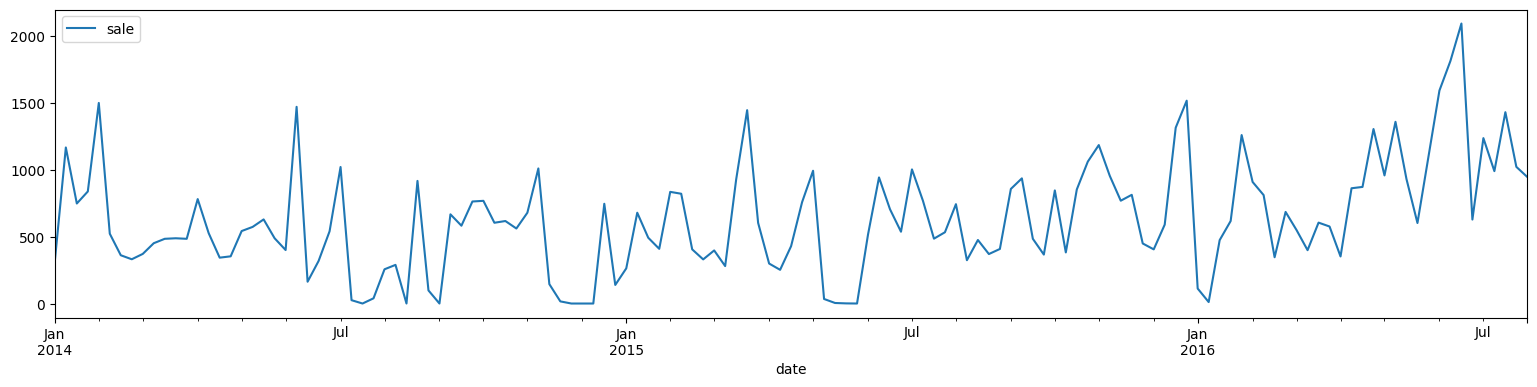

In [ ]:
# plotting data on the graph
df_sale.plot(figsize=(19,4))

# Observation:
  * It looks like there is a seasonality in the dataframe.
  * The graph is showing that the data is not stationary.
  * There is no trend in the graph.

In [ ]:
# changing the date column back from index to datetime type column
df_sale = df_sale.reset_index()

In [ ]:
df_sale.head()

,date,sale
0,2014-01-05,318
1,2014-01-12,1167
2,2014-01-19,748
3,2014-01-26,838
4,2014-02-02,1500


In [ ]:
# changing the column name of the dataframe
df_sale.columns = ['ds', 'y']

We have to change the column name to 'ds' and 'y' for the convenience of the algorithm we are going to use for forecasting (we are going to use prophet algorithm from facebook and this algorithm only accept date column as 'ds' and the output column as 'y')

In [ ]:
# showing the last 5 rows of the dataset
df_sale.tail()

,ds,y
130,2016-07-03,1237
131,2016-07-10,990
132,2016-07-17,1431
133,2016-07-24,1022
134,2016-07-31,946


So now our dataset is ready to put into the model for forecastong we did all the required EDA and preprocessing above and now we are going to train the model with this dataset.

# Model Building and Model training

In [ ]:
# importing Prophet algorithm from prophet
from prophet import Prophet

In [ ]:
# bilulding the model
model = Prophet()

We have build a model named 'model' and next we are going to train this model with our dataset which we have prepared above.

In [ ]:
# fitting the dataset into the model for traning
model.fit(df_sale)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg8_wztbp/2ivhh35z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg8_wztbp/37qmfbjz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61486', 'data', 'file=/tmp/tmpg8_wztbp/2ivhh35z.json', 'init=/tmp/tmpg8_wztbp/37qmfbjz.json', 'output', 'file=/tmp/tmpg8_wztbp/prophet_modelkkaoxoxw/prophet_model-20240128112900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


We have tained the model with the dataset and now we are going to predict the future demand i.e. demand for the next 2-3 weeks.

In [ ]:
# creating the next two weeks rows in the existing dataframe
future_dates = model.make_future_dataframe(periods=2, freq='W')

We are creating the next two weeks in the dataset to get our prediction for the future sales.

In [ ]:
# showing the new dataframe with 'ds' column
future_dates

,ds
0,2014-01-05
1,2014-01-12
2,2014-01-19
3,2014-01-26
4,2014-02-02
...,...
132,2016-07-17
133,2016-07-24
134,2016-07-31
135,2016-08-07


The new dataset will have 137 rows and 2 columns --> 'ds' and 'y'.

In [ ]:
# predicting the future sales of the retail store.
prediction = model.predict(future_dates)

We are making the prediction for the sale of the upcoming weeks i.e. after 2016-07-31.

In [ ]:
# showing the last 5 rows of the new predicted dataset.
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
132,2016-07-17,880.494559,499.678299,1348.222440,880.494559,880.494559,37.537614,37.537614,37.537614,37.537614,37.537614,37.537614,0.0,0.0,0.0,918.032174
133,2016-07-24,884.537215,414.306618,1254.932068,884.537215,884.537215,-48.048640,-48.048640,-48.048640,-48.048640,-48.048640,-48.048640,0.0,0.0,0.0,836.488576
134,2016-07-31,888.579871,287.396690,1148.502778,888.579871,888.579871,-176.799867,-176.799867,-176.799867,-176.799867,-176.799867,-176.799867,0.0,0.0,0.0,711.780004
135,2016-08-07,892.622527,257.689083,1082.933579,892.622527,892.622570,-256.478804,-256.478804,-256.478804,-256.478804,-256.478804,-256.478804,0.0,0.0,0.0,636.143723
136,2016-08-14,896.665184,267.651522,1074.603050,896.664719,896.665828,-241.019758,-241.019758,-241.019758,-241.019758,-241.019758,-241.019758,0.0,0.0,0.0,655.645425


We have created a dataset with so many columns but we have to focus on only the last column that is 'yhat'. This column has the future sales value for the weeks we are needed.

In [ ]:
# calulating the total of the 'yhat' column
prediction['yhat'].sum()

85996.98897809655

The total demand could be 85997 which included the future prediction i.e. the future weeks --> 2016-08-07 and 2016-08-14. Next we are going to calculate the demand for the only two weeks that we have to know.

In [ ]:
# calculating the only 2 weeks demand from the total predicted demand.
prediction['yhat'].sum() - df_sale['y'].sum()

1166.988978096546

From the total predicted demand, we have calculated the 2 weeks demand (that was our objective for this time series forecasting). The retailer should keep 1167 products in stock to meet the future weeks demand.

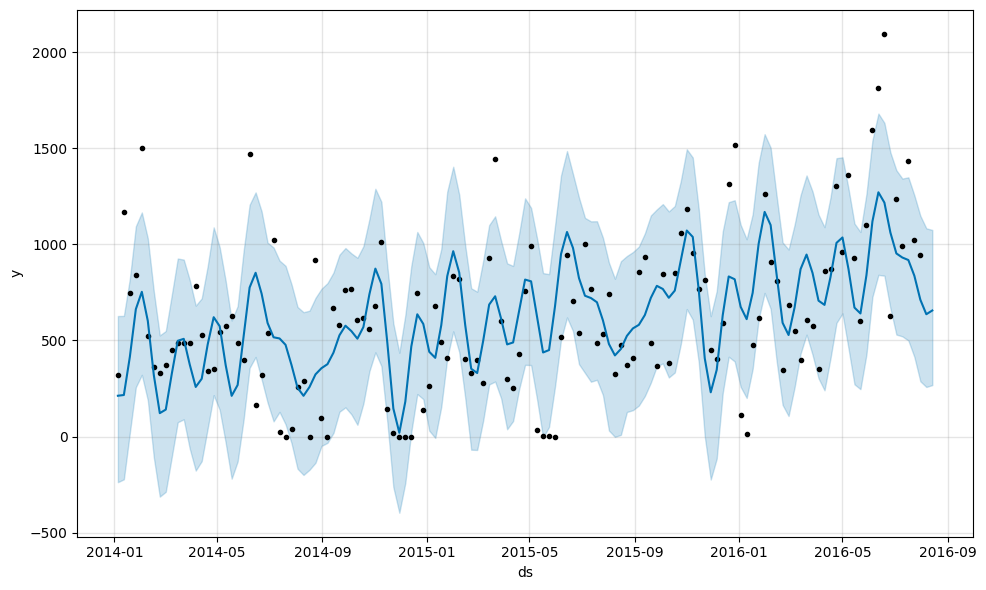

In [ ]:
model.plot(prediction);

# Conclusion
As we can see on the graph above that the predicted demand is increasing so we can say that the demand for the upcoming weeks may increase, it is reommended that the retailer must keep the stock so that he can meet the customers demand for the next few weeks.